In [4]:
import pandas as pd

df = pd.read_csv('./datasets/ThoraricSurgery.csv',header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


In [13]:
df.iloc[:,-1].value_counts()

0    400
1     70
Name: 17, dtype: int64

In [15]:
# train test set split
from sklearn.model_selection import train_test_split
x = df.drop(17,axis=1)
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [19]:
print(x_train.shape,x_test.shape)

(376, 17) (94, 17)


In [20]:
## 표준화 Standardscarer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_scaled_train = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

#### Dense
* tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

#### compile

* compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)


In [51]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np

np.random.seed(3)
tf.random.set_seed(3)

model = Sequential()
model.add(Dense(30,activation = 'sigmoid',input_shape=(17,)))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_scaled_train, y_train ,epochs=30,batch_size=10,validation_split=0.2)



Epoch 1/30
30/30 [==============================] - 1s 11ms/step - loss: 0.5007 - accuracy: 0.8433 - val_loss: 0.4436 - val_accuracy: 0.8816
Epoch 2/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4554 - accuracy: 0.8400 - val_loss: 0.4073 - val_accuracy: 0.8816
Epoch 3/30
30/30 [==============================] - 0s 5ms/step - loss: 0.4386 - accuracy: 0.8400 - val_loss: 0.3892 - val_accuracy: 0.8816
Epoch 4/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.8400 - val_loss: 0.3817 - val_accuracy: 0.8816
Epoch 5/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4284 - accuracy: 0.8400 - val_loss: 0.3757 - val_accuracy: 0.8816
Epoch 6/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4253 - accuracy: 0.8400 - val_loss: 0.3733 - val_accuracy: 0.8816
Epoch 7/30
30/30 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8400 - val_loss: 0.3706 - val_accuracy: 0.8816
Epoch 8/30
30/30 [=

In [52]:
result =  history.history

In [53]:
result['val_loss'][0]

0.4435688853263855

In [54]:
result['val_accuracy'][0]

0.8815789222717285

Text(0.5, 1.0, 'validation ')

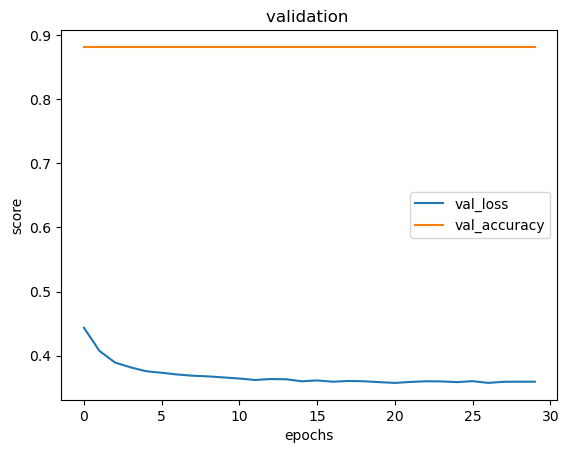

In [61]:
## matplotlib을 이용해서 그래프
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(result['val_loss'],label ='val_loss')
ax.plot(result['val_accuracy'],label='val_accuracy')
plt.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('score')
ax.set_title('validation ')

In [56]:
score = model.evaluate(x_scaled_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])

테스트 손실값: 0.3542338013648987
테스트 정확도: 0.8617021441459656
